In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vals1, vals2, vals3 = [], [], []
with open("redshift.dat", 'r') as f:
    for line in f:
        vals = line.split()
        vals1.append(float(vals[0]))
        vals2.append(float(vals[1]))
        vals3.append(float(vals[2]))
vals1 = np.array(vals1)
vals2 = np.array(vals2)
vals3 = np.array(vals3)

According to Larry Wasserman, the author of the very famous "All of Statistics", the following is redshift data that one gets from measuring something or other about galaxies (I don't know; he doesn't give much detail aside from just saying this is about space; see https://www.stat.cmu.edu/~larry/all-of-statistics/index.html to see what I mean.)  Anyway, we can at least visualize the data in a straightforward fashion.  

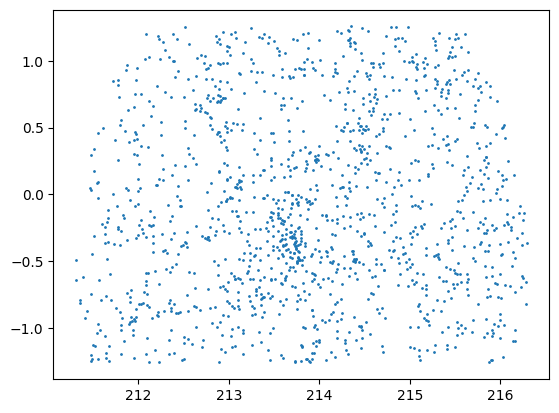

In [4]:
plt.scatter(vals1, vals2, s=1.)

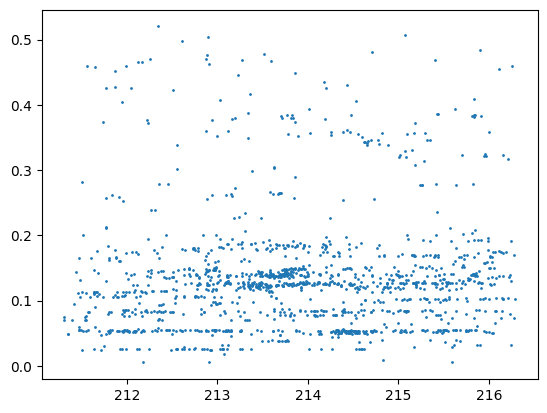

In [5]:
plt.scatter(vals1, vals3, s=1.)

A natural question that emerges then is how to characterize the data set `vals2` (which again has something to do with space).  To do that, and thus explore the bias/variance tradeoff we've beeen discussing in class, we generate a histogram of `vals2`.  

## Histograms

To define the problem, we suppose that we have data $D = \left\{X_{j}\right\}_{j=1}^{N_{D}}$ where are i.i.d. and $X_{j}\sim p(x)$, where $p(x)$ is some unknown distribution.  A _histogram_, say $\hat{p}_{H}(x)$ is a model/estimator of $p(x)$.  

To construct it, if we know $x\in [a,b]$, we divide $[a,b]$ into $K$ bins of width $\delta x  = (b-a)/K$ so that 

$$
[a,b]=\cup_{l=1}^{K}[a_{l},b_{l}), ~ a_{1}=a, ~ b_{K} = b, ~b_{l}=a_{l+1}, ~ b_{l}-a_{l} = \delta x
$$ 

Define an _indicator_ function for a set $A$ as $I_{A}(x)$ so that 

$$
I_{A}(x) = \left\{
\begin{array}{rl}
1 & x \in A \\ 
0 & x \notin A
\end{array}
\right.
$$

Then $\hat{p}_{H}(x)$ is defined to be

$$
\hat{p}_{H}(x) = \frac{1}{\delta x} \sum_{l=1}^{K} \hat{p}_{l} I_{[a_{l},b_{l})}(x), ~ \hat{p}_{l} = \frac{N_{l}}{N_{D}}
$$

where $N_{l}$ is the number of data points in the $l^{th}$-bin, i.e.

$$
N_{l} = \sum_{j=1}^{N_{D}}I_{[a_{l},b_{l})}(X_{j}),
$$

so that $\sum_{l=1}^{K}N_{l} = N_{D}$.

**Problem 1**: Using the `vals2` data set:

* Plot the histogram (use `plt.hist`) using $K=2$.
* Plot the histogram (use `plt.hist`) using $K=20$.
* Plot the histogram (use `plt.hist`) using $K=200$.

How would you describe the differences in these plots in terms of bias and variance?  

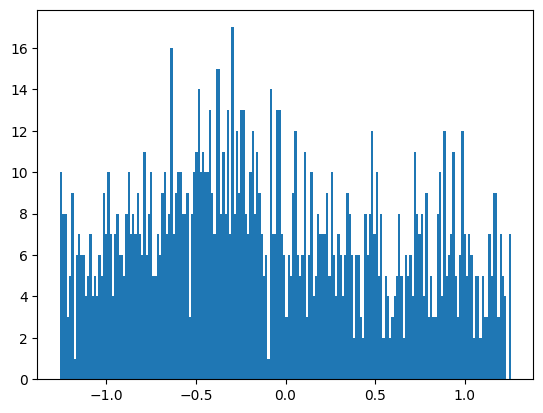

In [6]:
plt.hist(vals2, bins=200);

# Bias/Variance Analysis in Statistical Modeling

The abstract data analysis problem is for data say $\left\{(x_{j},y_{j})\right\}_{j=1}{N_{B}}$ where 

$$
y_{j} = f(x_{j}) + \epsilon_{j}, ~ \epsilon_{k} \sim \mathbb{P}
$$

where $f(\cdot)$ is thought of as the true relationship between domain and range but which is otherwise un-observable because of noise $\epsilon_{j}$.  Thus we have to introduce some model $f_{M}$ and approximate $y_{j} \approx f_{M}(x_{j})$.  To assess the quality of our model, we look at the mean-squared error (MSE) given by

$$
\text{MSE} = \mathbb{E}\left[\int\left(f(x) - f_{M}(x) \right)^{2} dx\right].
$$

Through a bit of wrangling, we can rewrite this as 

$$
\text{MSE} = \int\left(f(x) - \mathbb{E}\left[f_{M}(x)\right] \right)^{2} dx + \mathbb{E}\left[\int\left(f_{M}(x) - \mathbb{E}\left[f_{M}(x)\right] \right)^{2} dx\right].
$$

This then gives us $\text{MSE} = \text{Bias}^2 + \text{Variance}$ where

$$
\text{Bias}^{2} = \int\left(f(x) - \mathbb{E}\left[f_{M}(x)\right] \right)^{2} dx, ~ \text{Variance} = \mathbb{E}\left[\int\left(f_{M}(x) - \mathbb{E}\left[f_{M}(x)\right] \right)^{2} dx\right].
$$

## Bias/Variance Analysis for the Histogram

So, as we've discussed in class (and as is further explored in the homework), if we are attempting to approximate some unknown probability density $p(x)$ via a histogram $p_H(x)$, then on interval $[a,b]$, if we divide into $K$ equispaced bins so that $\delta x = (b-a)/K$, we have on each subinterval $[a_{l},b_{l}]$ that 

$$
\mathbb{E}[p_{H}(x)] = \frac{p_{l}}{\delta x}, ~ p_{l} = \int_{a_{l}}^{b_{l}}p(x) dx, ~ x\in[a_{l},b_{l}].  
$$

Following the formulas above, we can then show 

$$
\text{Bias}^{2} = \int_{a_{l}}^{b_{l}}p^{2}(x) dx - \frac{p^{2}_{l}}{\delta x}.  
$$

Likewise, as you show in the homework, we get 

$$
\text{Variance} = \frac{1}{(\delta x)^{2}N_{D}}p_{l}(1-p_{l})
$$

To study this, lets pick $p(x)$ to be the beta-distribution so that 

$$
p(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}, ~ 0\leq x \leq 1, ~ \alpha,\beta > 0.
$$

Here $\Gamma(x)$ is given by 
$$
\Gamma(x) = \int_{0}^{\infty} t^{x-1}e^{-t}dt, ~ x > 0.  
$$

Keep in mind, we also have our cross-fold histogram estimator to determine the optimal number of bins $K$.  The formula for that is

$$
J(K) = \frac{2}{\delta x (N_{D}-1)} - \delta x\frac{N_{D}+1}{N_{D}-1}\sum_{l=1}^{K}\left(\frac{\hat{p}_{l}}{\delta x}\right)^{2}
$$

In [ ]:
# cross-validator

def cross_val(bincnt, samples):
    nd = samples.size
    dx = 1./bincnt

    hist, bins = np.histogram(samples, bins=bincnt, density=True)
    error = 2./(dx * (nd-1)) - dx * (nd+1)/(nd-1) * np.sum( hist**2. )
    return bins, hist, error

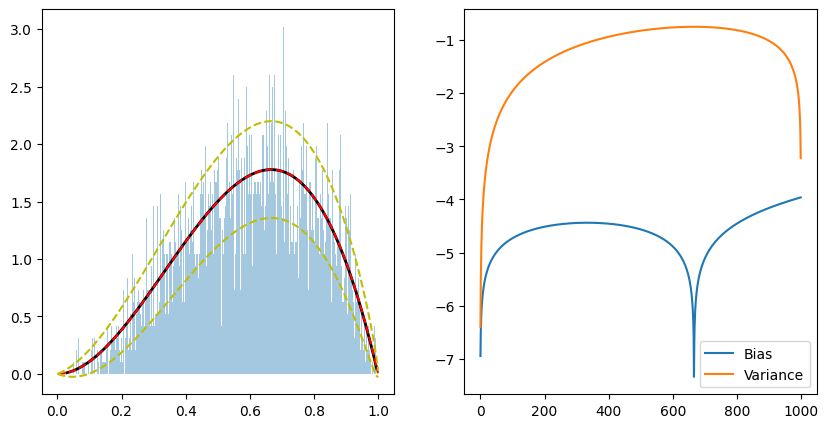

In [74]:
from scipy.stats import beta
from scipy.integrate import quad

a, b = 3., 2.
K = 1000
Nd = 10000

data = beta.rvs(a, b, size=Nd) 
beta_fun = lambda x: beta.pdf(x, a, b)
beta_fun_sq = lambda x: beta.pdf(x, a, b)**2.
bins = np.linspace(0, 1., K+1)
dx = bins[1] - bins[0]

mean_ph = np.zeros(K, dtype=np.float64)
bias = np.zeros(K, dtype=np.float64)
var = np.zeros(K, dtype=np.float64)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax.ravel()

for ll in range(K):
    pll = quad(beta_fun, bins[ll], bins[ll+1])[0]
    psqll = quad(beta_fun_sq, bins[ll], bins[ll+1])[0]
    
    mean_ph[ll] = pll/dx
    bias[ll] = np.sqrt(psqll - pll**2./dx)
    var[ll] = pll*(1.-pll)/(Nd * dx**2.)

ax[0].hist(data, density=True, bins=K, alpha=0.4)
x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100)
ax[0].plot(x, beta.pdf(x, a, b), 'k-', lw=2, alpha=1, label='beta pdf')
ax[0].plot(bins[1:], mean_ph, 'r--')
ax[0].plot(bins[1:], mean_ph+np.sqrt(var), 'y--')
ax[0].plot(bins[1:], mean_ph-np.sqrt(var), 'y--')

ax[1].plot(np.log10(bias), label='Bias')
ax[1].plot(np.log10(var), label='Variance')
ax[1].legend()




Let's also look at how $J(K)$ changes for different $K$.  

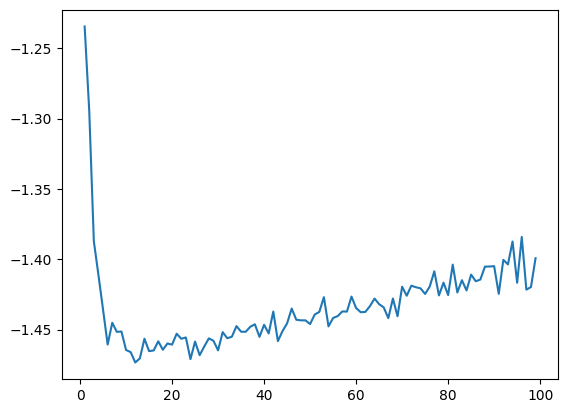

In [67]:
bincnts = np.arange(1,100) # Explore bin counts 
errors = np.zeros(len(bincnts))
for jj, bincnt in enumerate(bincnts):
    bins, hist, error = cross_val(bincnt, data)
    errors[jj] = error

plt.plot(bincnts, errors)